# Analysis and Visualization of the IPL 2024 Final Match: KKR vs SRH

#### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### KKR vs SRH CSV Data Preview

In [2]:
final = pd.read_csv(r"C:\Users\PHOENIX\OneDrive\Desktop\kkr Vs srh.csv")
final.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Sun Risers Hyderabad,1.0,Abhishek Sharma,Mitchell Starc,Travis Head,0.0,0.0,0.0,NaN,NaN,[]
1,Sun Risers Hyderabad,1.0,Abhishek Sharma,Mitchell Starc,Travis Head,0.0,0.0,0.0,NaN,NaN,[]
2,Sun Risers Hyderabad,1.0,Abhishek Sharma,Mitchell Starc,Travis Head,0.0,0.0,0.0,NaN,NaN,[]
3,Sun Risers Hyderabad,1.0,Abhishek Sharma,Mitchell Starc,Travis Head,2.0,0.0,2.0,NaN,NaN,[]
4,Sun Risers Hyderabad,1.0,Abhishek Sharma,Mitchell Starc,Travis Head,0.0,0.0,0.0,Abhishek Sharma,bowled,[]


The dataset has several null values. But we don’t need to drop any row with null values in this case or fill any null value as it will affect the data.
So, without wasting any time, let’s start by visualizing the run distribution per over for both teams to illustrate the scoring trends throughout the innings:

#### Run Distribution Per Over Analysis

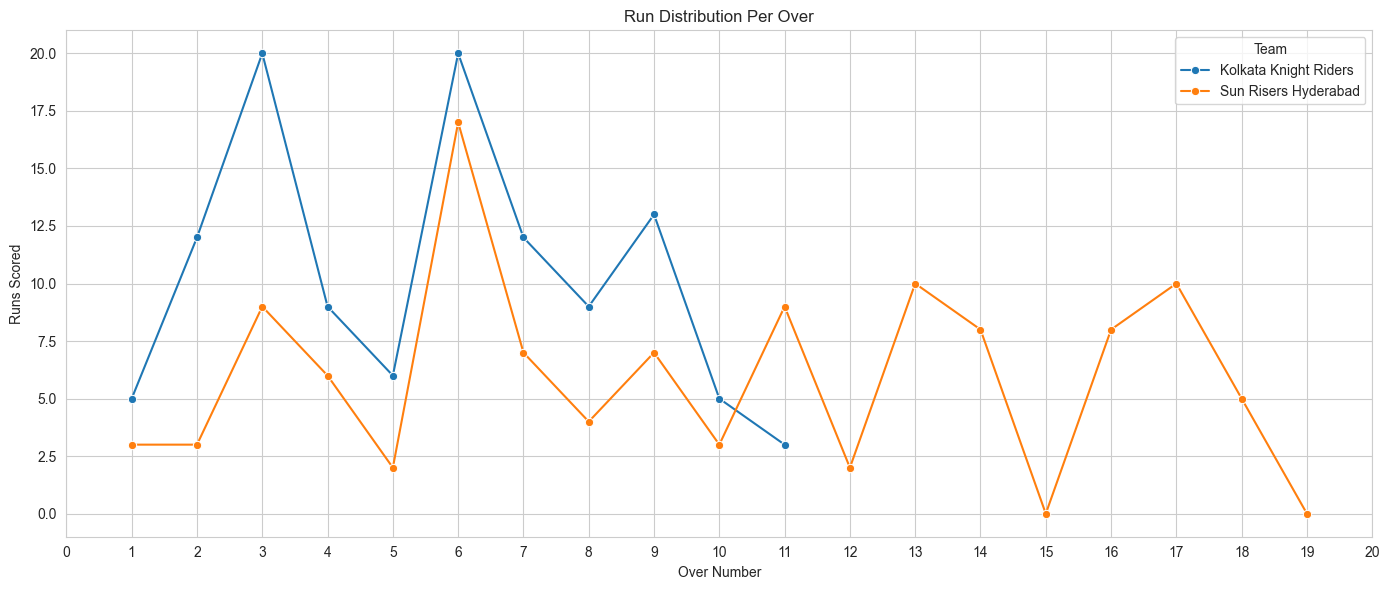

In [204]:
# data preparation for run distribution per over
run_distribution = final.groupby(["team","over"]).agg({"runs_total":"sum"}).reset_index()
sns.set_style("whitegrid")
# plotting run distribution per over for both teams
plt.figure(figsize=(14,6))
sns.lineplot(data= run_distribution,x= "over",y= "runs_total",hue= "team",marker= "o",ci= None,errorbar= None)
plt.title("Run Distribution Per Over")
plt.xlabel("Over Number")
plt.ylabel("Runs Scored")
plt.xticks(range(0,21))
plt.legend(title= "Team")
plt.tight_layout()

The plot above shows the run distribution per over for both teams. Here are some insights:


The scoring rate for each team shows fluctuations throughout their innings, with spikes indicating overs with high scoring, likely due to boundaries or big hits.
 Kolkata Knight Riders (KKR) appears to have a couple of overs with significantly higher runs, suggesting aggressive batting.

Next, I’ll analyze the top scorers from each team to highlight individual performances. Let’s create a bar chart to visualize the top contributors in terms of runs

#### Top Scorers Analysis: Each Team's Leading Run Contributors

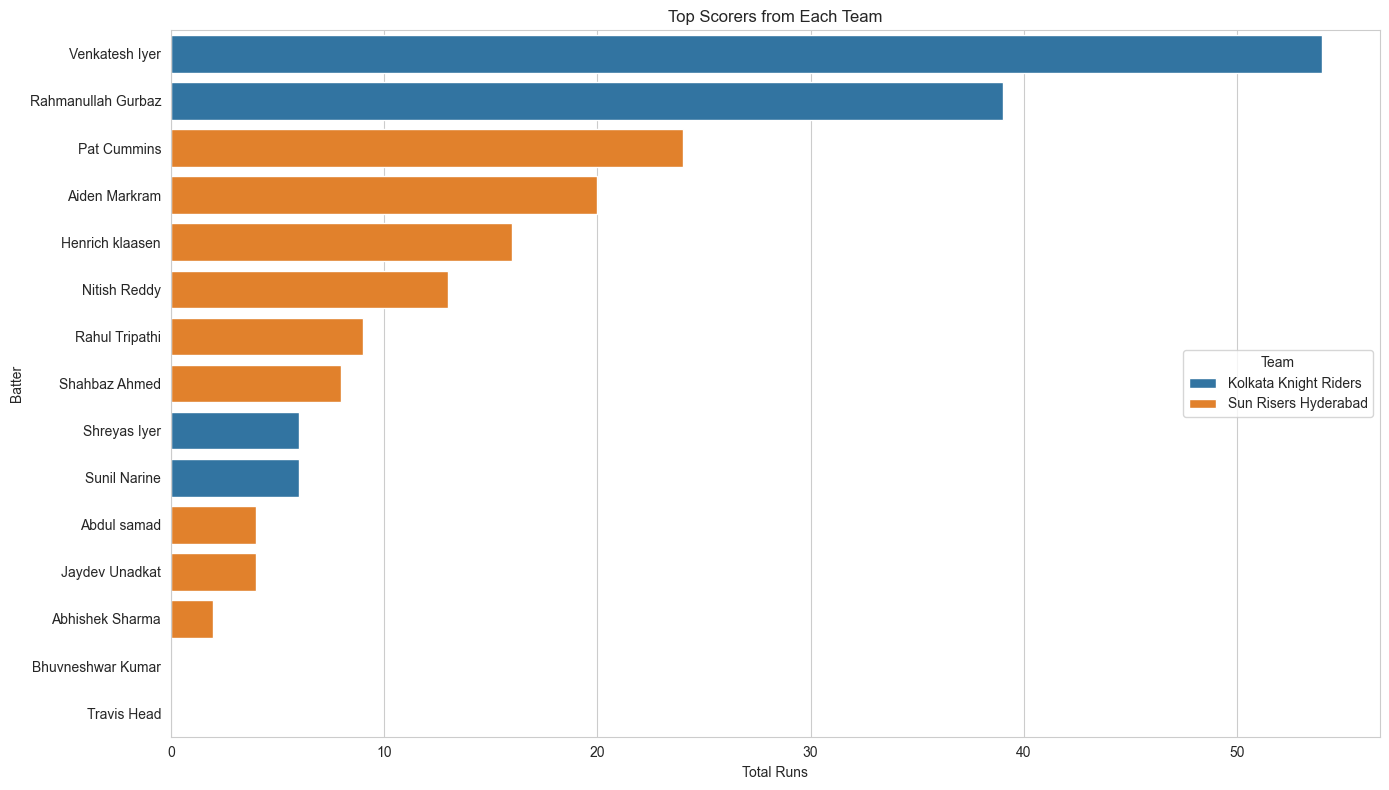

In [206]:
# calculating top scorers for each team
top_scores = final.groupby(["team","batter"]).agg({"runs_batter":"sum"}).reset_index().sort_values(by= "runs_batter",ascending= False)
plt.figure(figsize=(14,8))
sns.barplot(data= top_scores,x= "runs_batter",y= "batter",hue= "team",orient="h",dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.tight_layout()

 Key observations from the graph include
-  Venkatesh Iyer from KKR stands out as the top scorer of the match, amassing slightly over 50 runs. His performance significantly surpasses that of all other players.
-  Pat Cummins emerges as the leading scorer for SRH, contributing 24 runs.- The graph displays a diverse contribution from both teams, with several players from both sides contributing notable scores.


Now, let’s move on to a bowling analysis. We’ll look at which bowlers took the most wickets and their economy rates. It will involve calculating the number of wickets each bowler took and the number of runs they conceded per over bowled. We’ll present this data in a combined bar and line plot for a comprehensive view of bowling performance

#### Comprehensive Bowling Analysis: Wickets Taken and Economy Rate

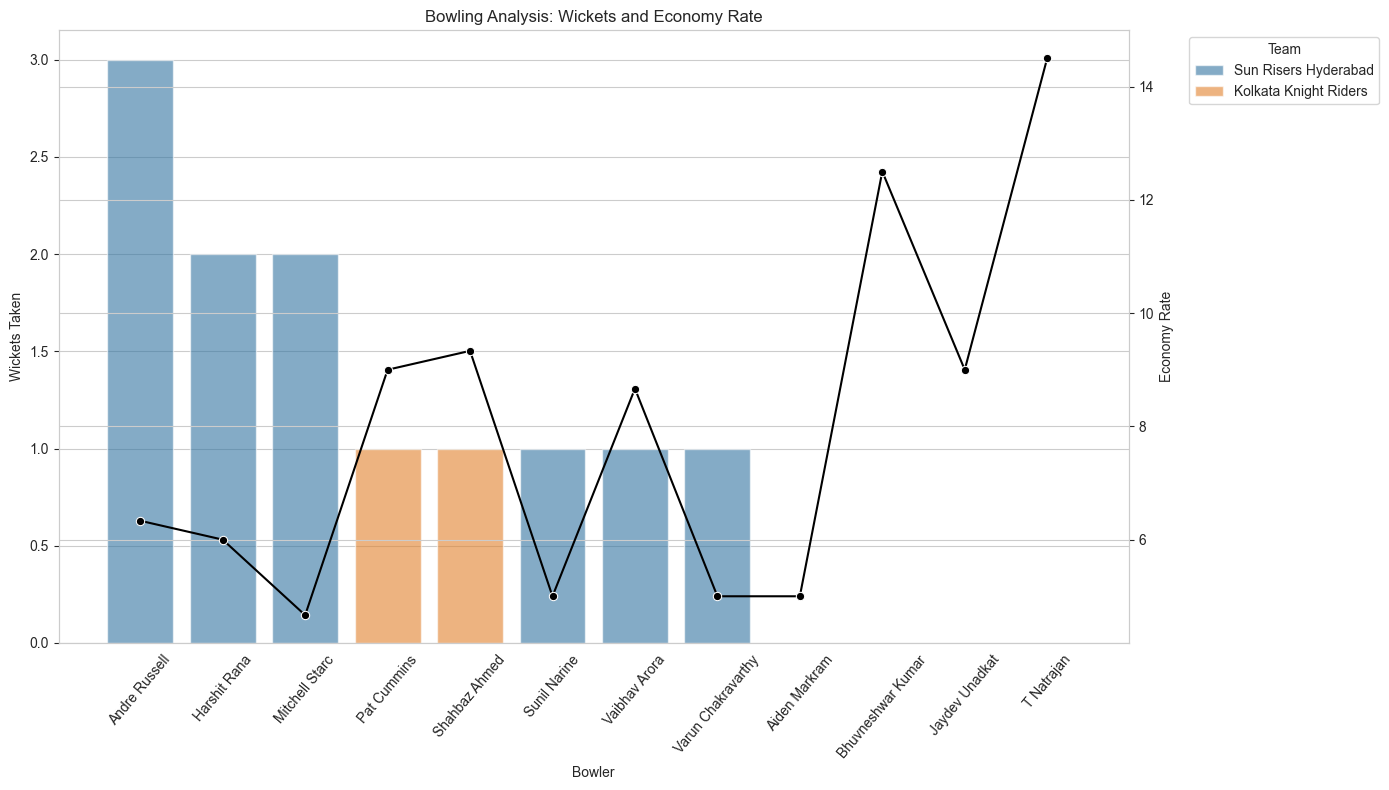

In [25]:
# preparing data for bowling analysis
final["wickets_taken"] = final["wicket_kind"].notna().astype(int)
bowling_stats = final.groupby(["team","bowler"]).agg({"runs_total":"sum","wickets_taken":"sum","over":"nunique"}).reset_index()
# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats["economy_rate"] = bowling_stats["runs_total"]/bowling_stats["over"]
# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by="wickets_taken",ascending= False)
# create the plot
fig,ax1 = plt.subplots(figsize=(14,8))
# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler',)
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation= 50)
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')
plt.tight_layout()

The combined bar and line plot provides a comprehensive overview of the bowling performance of each team:

Wickets Taken: The bars indicate the number of wickets each bowler took during the match. The height of the bars reflects how successful the bowlers were in terms of taking wickets. Bowlers from both teams contributed to taking wickets, with some notable performances that stand out due to higher bars.

Economy Rate: The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler. The economy rate is crucial as it indicates how economically a bowler has bowled in terms of runs given away.


Kolkata Knight Riders bowling lineup displayed a strong performance. Andre Russell led with 3 wickets and an economy rate of 6.33, followed closely by Harshit Rana and Mitchell Starc, both with 2 wickets each and impressive economy rates of 6 and 4.67 respectively.

Sun Risers Hyderabad'ss struggled in comparison. Pat Cummins and Shahbaz Ahmed managed 1 wicket each, with economy rates of 9 and 9.3s.

In summaKolkata Knight Riders'ad's bowlers outperforSun Risers Hyderabad'sers' bowlers in terms of wickets taken and economy rates.

Now, let’s analyze the types of dismissals that occurred during the match to understand how most wickets were taken (e.g., caught, bowled, run out). This can provide insights into the nature of the pitch and the playing conditions. We’ll visualize this using a pie chart


#### Dismissal Analysis: Distribution of Dismissal Types

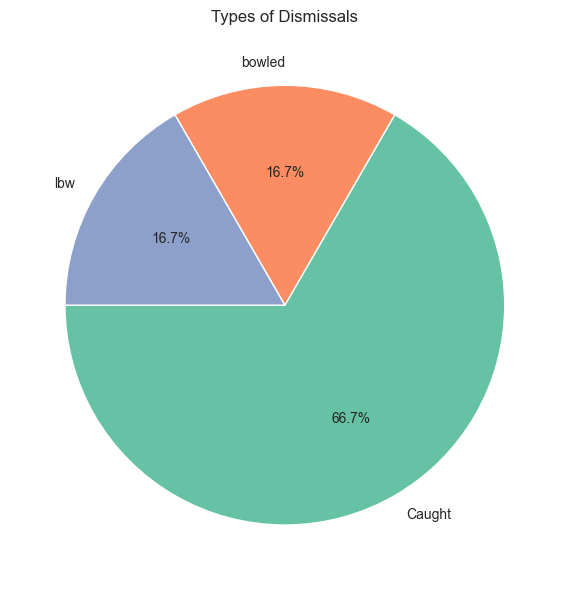

In [48]:
# counting dismissal types
dismissal_types = final["wicket_kind"].dropna().value_counts()
plt.figure(figsize=(6,6))
plt.pie(x= dismissal_types,labels=dismissal_types.index,autopct="%1.1f%%",startangle=180,colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.tight_layout()

So, the majority of wickets were taken by catches, followed by bowled and lbw

Now, let’s perform Partnerships Analysis by calculating and visualizing the most productive batting partnerships in the match. We’ll look at runs scored per partnership and how long each partnership lasted in terms of balls faced

#### Analysis of Significant Batting Partnerships: Runs Scored by Batters

In [88]:
#function to calculate partnerships
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
# append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships


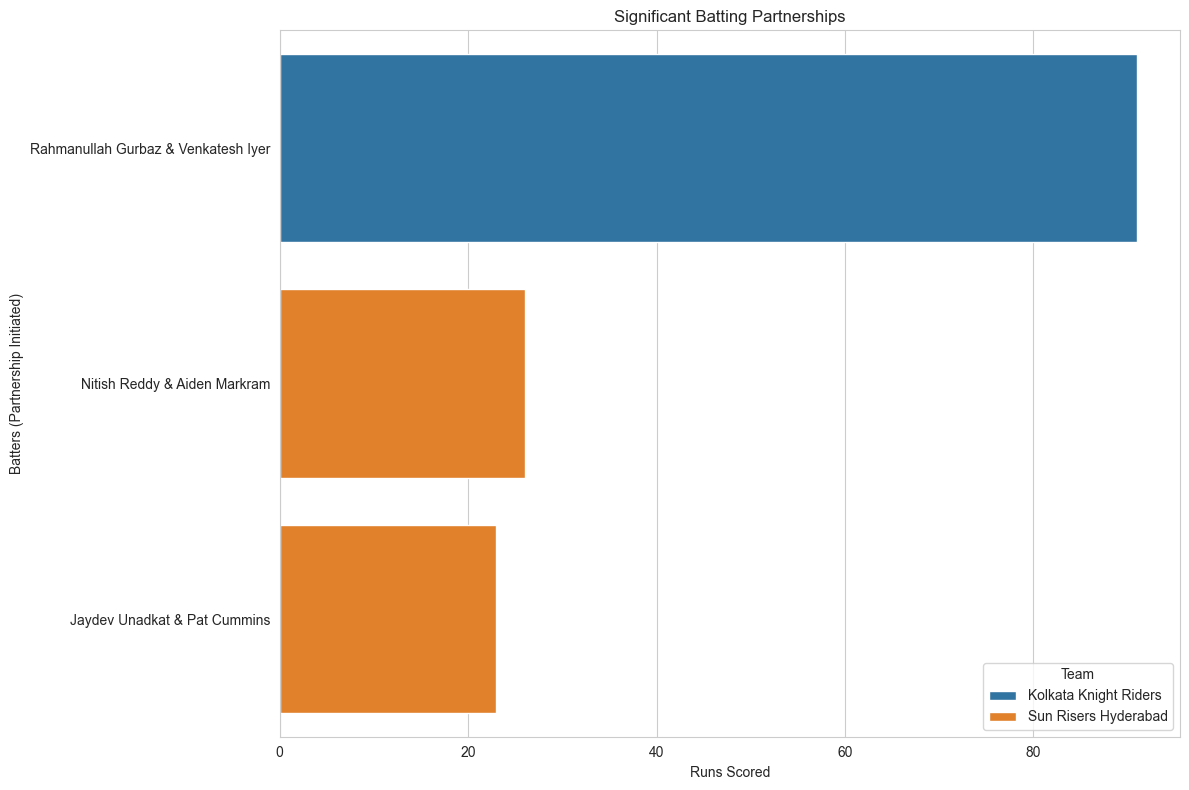

In [90]:
# calculate partnerships
partnerships_data = calculate_partnerships(final)
partnerships_df = pd.DataFrame(partnerships_data)
# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnership = partnerships_df[partnerships_df["runs"]>20]
# sort by highest runs
significant_partnership = significant_partnership.sort_values(by= "runs",ascending= False)
# Concatenate batter1 and batter2
significant_partnership['batters'] = significant_partnership['batter1'] + ' & ' + significant_partnership['batter2']

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnership, x='runs', y='batters', hue='team', orient= "h",dodge= False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batters (Partnership Initiated)')
plt.legend(title='Team')
plt.tight_layout()

The bar chart displays significant batting partnerships from the match, highlighting partnerships that scored more than 20 runs. Here’s how these insights contribute to our analysis

The chart identifies key partnerships that likely had a substantial impact on the match’s outcome, illustrating the effectiveness of batting pairs.
It provides insights into which players were involved in pivotal stands, which can help in assessing player form and team strategy.

Next, let’s perform a Phase Analysis to examine how teams performed during different stages of their innings; Powerplay (first 6 overs), Middle overs (7-15), and Death overs (16-20).
We’ll look at scoring rates and wicket loss during these phases. This can offer insights into the team’s tactical approach and execution under varying conditions

#### Analysis of Match Phases: Runs and Wickets Distribution

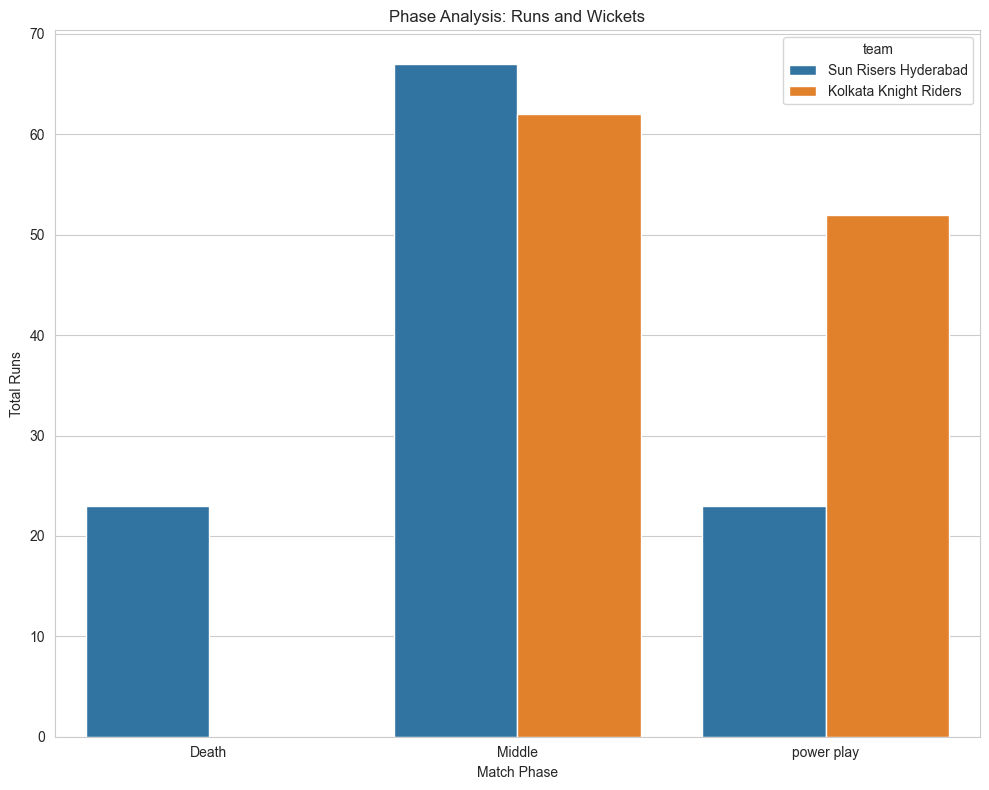

In [132]:
# function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return "power play"
    elif over < 16:
        return "Middle"
    else:
        return "Death"
# adding phase information to the dataframe
final["phase"] = final["over"].apply(classify_phase)
# grouping data by phase and team to calculate runs and wickets
phase_analysis = final.groupby(["phase","team"]).agg({"runs_total":"sum","wickets_taken":"sum","over":"count"}).rename(columns={'over': 'balls'}).reset_index()
# calculating the run rate
phase_analysis["run_rate"] = (phase_analysis["runs_total"]/phase_analysis["balls"])*6
# plotting the phase analysis
fig, ax1= plt.subplots(figsize=(10,8))
# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')
plt.tight_layout()


The plot above provides a clear breakdown of the match into different phases - Powerplay, Middle, and Death - and illustrates how each team performed during these segmens:

Now, let’s calculate the strike rates for all batters in this match and then analyze the data to see which players were the most effective in terms of scoring quickly. After calculating the strike rates, we can look at correlations with other variables such as runs scored or the phase of play during which the runs were scored. This can give us insights into which players accelerate scoring at crucial times or against specific bowlers. First, I’ll calculate the strike rate for each batter

#### Batter Performance Analysis

In [141]:
# calculate runs and balls faced for each batter
batter_stats = final.groupby("batter").agg({"runs_batter":"sum","over":"count"}).rename(columns={"over":"balls_faced"}).reset_index()
# calculate strike rate for each batter (runs per 100 balls)
batter_stats["strike_rate"] = (batter_stats["runs_batter"]/batter_stats["balls_faced"])*100
# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)
# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head()

,batter,runs_batter,balls_faced,strike_rate
12,Sunil Narine,6.0,2,300.000000
14,Venkatesh Iyer,54.0,26,207.692308
11,Shreyas Iyer,6.0,3,200.000000
6,Nitish Reddy,13.0,10,130.000000
7,Pat Cummins,24.0,19,126.315789


Here are the top performers in terms of strike rate from the match

Sunil Narine had the highest strike rate at 300, scoring 6 runs from just 2 balls.

Venkatesh Iyer also scored efficiently, with a strike rate of 207.6, making 54 runs from 26 balls.

Now, let’s dive deeper by looking at how the strike rate varied with the phase of the game for these top performers. It could give insights into strategic scoring and game dynamics during different innings stages

#### Analysis of Top Performers: Strike Rate Across Match Phases

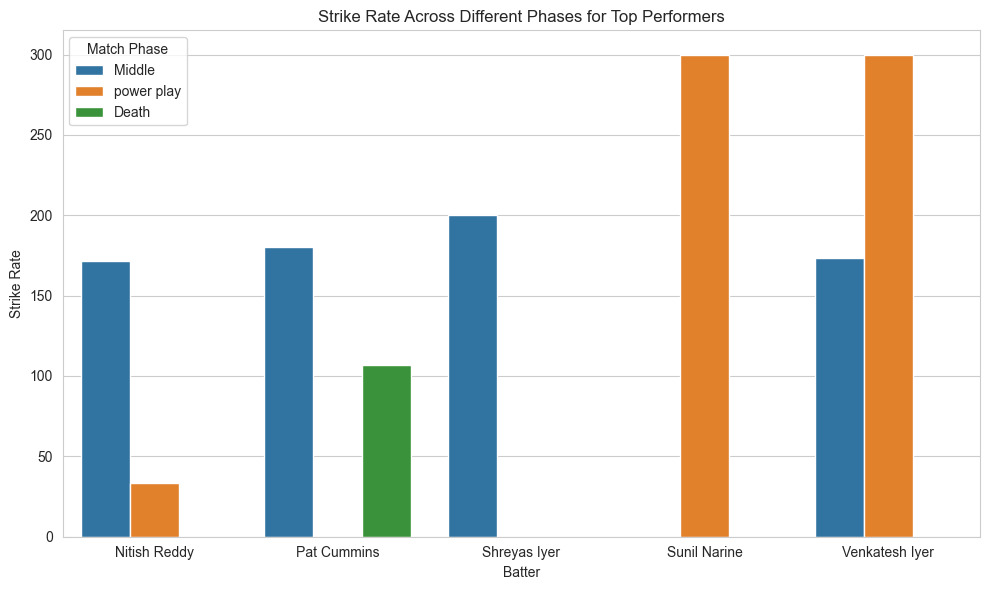

In [143]:
# merging phase information with batter stats
batter_phase_stats = final.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()
# calculate strike rate for each batter-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100
# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]
# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.tight_layout()

he bar chart illustrates how the strike rates of the top performers varied across different phases of the match:

Nitish Reddy stands out with a particularly high strike rate in the Middle phase (171.43), suggesting a highly aggressive and effective batting performance during this part of the innings. In the Powerplay, his strike rate drops significantly to 33.33, indicating a more cautious approac
h.
Pat Cummins has a high strike rate in both the Death phase (107.14) and the Middle phase (180.00), indicating his ability to accelerate scoring towards the end of the innings as well as maintaining aggression in the middle ove
rs.
Shreyas Iyer shows an impressive strike rate of 200.00 in the Middle phase, indicating a very effective batting performance during this phase.
Sunil Narine has a remarkable strike rate of 300.00 in the Powerplay, showcasing his explosive start and aggressive batting in the initial overs.
Venkatesh Iyer exhibits high strike rates in both the Middle phase (173.68) and the Powerplay (300.00), highlighting his ability to score quickly in both early and middle parts of the innings.

The bar chart illustrates how the strike rates of the top performers varied across different phases of the match:

J Fraser-McGurk stands out with a particularly high strike rate in the Middle phase, significantly higher than any other phase or player, suggesting a highly aggressive and effective batting performance during this part of the innings.
V Kohli and RM Patidar both have high strike rates in the Death phase, indicating their ability to accelerate scoring towards the end of the innings, which is crucial for setting or chasing targets.
AR Patel shows consistency in the Powerplay and Middle phases with a slightly reduced but still competitive strike rate, indicating his role as a steady opener or middle-order batter.
KV Sharma exhibits a lower strike rate in the Middle phase compared to others, suggesting a more conservative approach during this phase or difficulty in accelerating.

#### Identifying Turning Points of the Match

To identify the turning point where Sun Risers Hyderabad (SRH) might have lost the game and Kolkata Knight Riders (KKR) gained the upper hand, we can analyze the cumulative run rate comparision throught the innings and look at wicket fall events. 

Compare cumulative Run Rates: Plot the cumulative run rates of both teams throught their innings to see where KKR started to outpace SRH significantly.

Wicket Analysis : Examine the timings and impacts of wicket falls on the scoring rate and momentum for SRH.

High Impact Overs: Identify any overs where KKR took multiple wickets or SRH had a significantly low scoring rate, which could indicate a loss of momentum.

Let's start by plotting the cumulative run rate for both teams and overlaying the wicket events to pinpoint critical moments in the match

#### Cumulative Runs and Wickets Analysis: KKR vs SRH

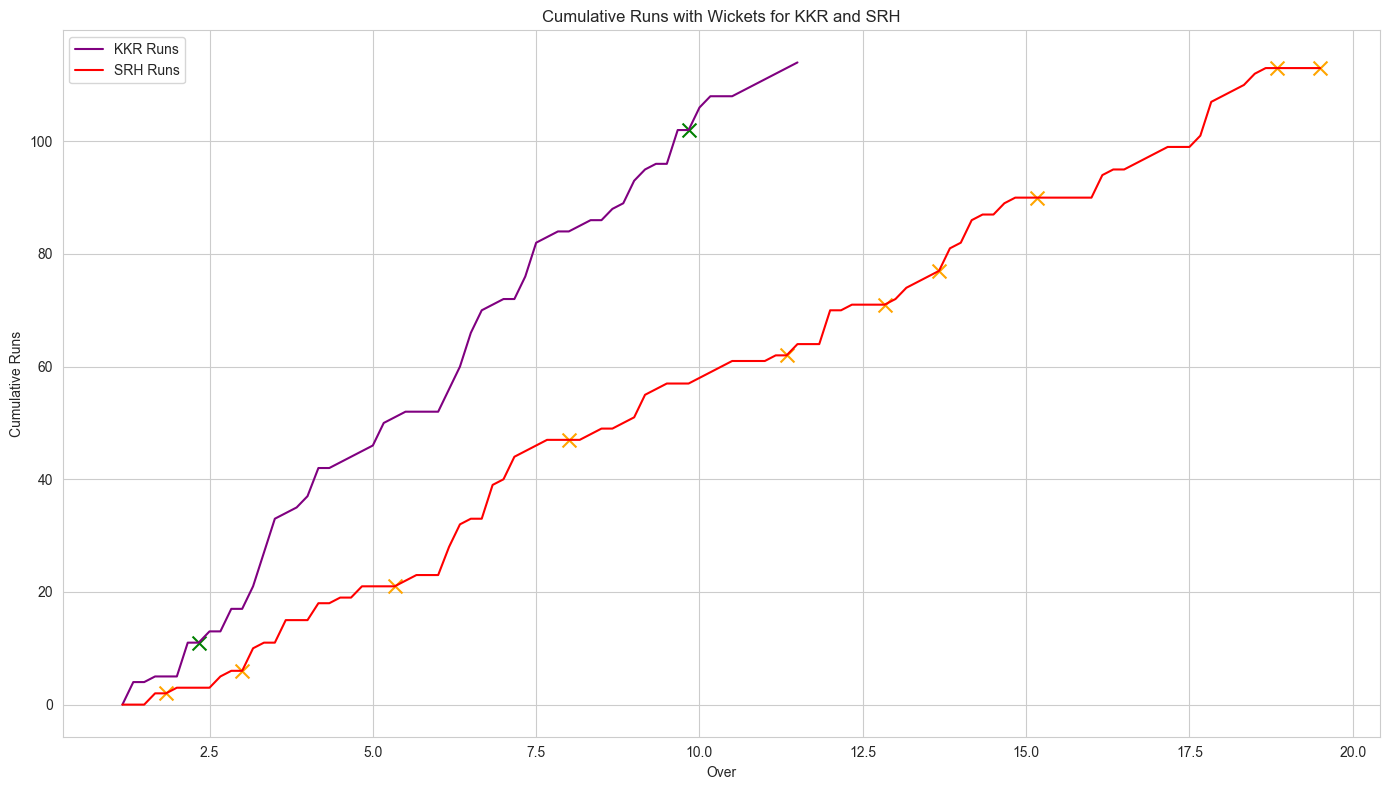

In [171]:
# calculate cumulative runs and wickets for each ball for both teams
final["cumulative_runs"] = final.groupby("team")["runs_total"].cumsum()
final["cumulative_wickets"] = final.groupby("team")["wickets_taken"].cumsum()
# separate data for both teams
kkr_deliveries = final[final["team"] == "Kolkata Knight Riders"]
srh_deliveries = final[final["team"] == "Sun Risers Hyderabad"]
# calculating overs for cumulative analysis
kkr_deliveries["over_ball"] = kkr_deliveries["over"] + (kkr_deliveries.groupby("over").cumcount() + 1)/6
srh_deliveries["over_ball"] = srh_deliveries["over"] + (srh_deliveries.groupby("over").cumcount() +1)/6
# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14,8))
# plot for KKR
ax.plot(kkr_deliveries["over_ball"],kkr_deliveries["cumulative_runs"],color= "purple",label= "KKR Runs")
ax.scatter(kkr_deliveries[kkr_deliveries["wickets_taken"] == 1]["over_ball"],kkr_deliveries[kkr_deliveries["wickets_taken"] == 1]["cumulative_runs"],color= "green", marker= "x",s= 100)
# plot for SRH
ax.plot(srh_deliveries["over_ball"],srh_deliveries["cumulative_runs"],color= "red",label= "SRH Runs")
ax.scatter(srh_deliveries[srh_deliveries["wickets_taken"] == 1]["over_ball"],srh_deliveries[srh_deliveries["wickets_taken"] == 1]["cumulative_runs"],color= "orange", marker= "x",s= 100)
ax.set_title('Cumulative Runs with Wickets for KKR and SRH')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.tight_layout()

The plot shows the cumulative runs scored by each team throughout their innings, with markers indicating 

Momentum Shifts: The points where wickets are lost are crucial. KKR's run line remains relatively stable with only two wickets lost, suggesting a steady and controlled innings. In contrast, SRH's run line shows significant downturns at each wicket, indicating moments of momentum loss.

Performance Analysis: KKR’s ability to maintain a steady run rate despite losing two wickets highlights their strong batting lineup and effective innings management. They capitalized on key moments and avoided collapses. On the other hand, SRH's frequent wickets prevented them from building substantial partnerships, reflecting vulnerabilities in their batting order and possibly ineffective recovery strategies after losing wickets.


Now, let’s calculate the run rate for each over for both teams and see how the run rates changed throughout the innings, particularly focusing on the overs where wickets fell

#### Run Rates and Wickets Per Over Analysis: KKR vs SRH

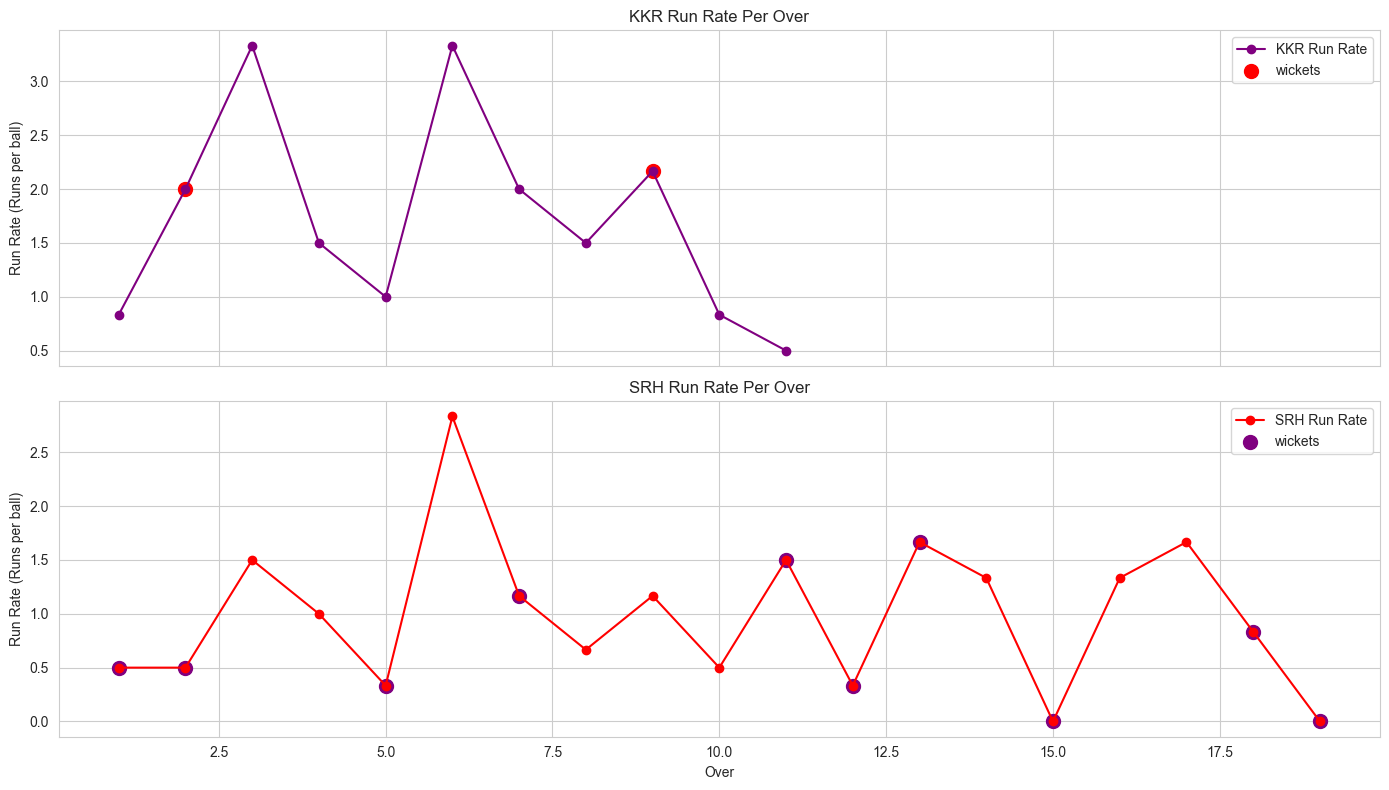

In [201]:
# calculate runs and wickets per over for both teams
per_over_stats = final.groupby(["team","over"]).agg({"runs_total":"sum","wickets_taken":"sum"}).reset_index()
# calculate run rate for each over
per_over_stats["run_rate"] = per_over_stats["runs_total"]/6
# separate data for KKR and SRH for plotting
kkr_per_over_stats = per_over_stats[per_over_stats["team"] == "Kolkata Knight Riders"]
srh_per_over_stats = per_over_stats[per_over_stats["team"] == "Sun Risers Hyderabad"]
# plotting run rates and marking wickets for each team
fig, (ax1,ax2) = plt.subplots(2,1,figsize= (14,8),sharex=True)
# KKR
ax1.plot(kkr_per_over_stats["over"],kkr_per_over_stats["run_rate"],marker="o",color="purple",label= "KKR Run Rate")
ax1.scatter(kkr_per_over_stats[kkr_per_over_stats["wickets_taken"]>0]["over"],kkr_per_over_stats[kkr_per_over_stats["wickets_taken"]>0]["run_rate"],color="red",s=100,label= "wickets")
ax1.set_title('KKR Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()
#SRH
ax2.plot(srh_per_over_stats["over"],srh_per_over_stats["run_rate"],marker="o",color="red",label= "SRH Run Rate")
ax2.scatter(srh_per_over_stats[srh_per_over_stats["wickets_taken"]>0]["over"],srh_per_over_stats[srh_per_over_stats["wickets_taken"]>0]["run_rate"],color="purple",s=100,label= "wickets")
ax2.set_title('SRH Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()
plt.tight_layout()

The plotted run rates for each over, along with the moments when wickets were taken (marked with large dots), provide insights into how the match’s dynamics evolved

KKR Run Rate Fluctuations: 

KKR’s run rate shows notable fluctuations throughout their innings. It peaks at around 3.3 runs per ball during the 3rd and 6th overs, indicating periods of high scoring. However, there are also significant drops, particularly in the 4th and 5th overs, where the run rate falls to 1.5 and 1.0 respectively. The presence of wicket markers (large red dots) during the 2nd and 9th overs suggests that wickets were lost in overs where the run rate was still moderately high, indicating that KKR managed to maintain some momentum despite these setbacks.

SRH Run Rate Patterns: 

SRH's run rate starts slow and remains relatively low throughout their innings, reflecting a challenging batting performance. After the initial overs, the run rate peaks at around 2.8 runs per ball in the 6th over but then sees sharp declines, particularly in the 5th and 15th overs where it drops to 0.33 and 0 runs per ball respectively. Wickets (large blue dots) are taken in crucial overs such as the 1st, 2nd, 5th, 7th, 11th, 12th, 13th, 15th, 18th, and 19th, indicating frequent disruptions to their batting flow. These frequent wicket losses, especially in overs where the run rate drops, suggest effective bowling from KKR and a struggle by SRH to build and sustain momentum throughout their innings.

#### Strategic Analysis: KKR vs SRH - IPL 2024 Final

The final match of IPL 2024 between KKR and SRH highlighted a blend of strategic batting, aggressive bowling, and critical partnerships. KKR’s ability to maintain a steady cumulative run rate, coupled with effective wicket-taking in crucial overs, played a significant role in their victory. Despite early fluctuations in their run rate, KKR’s strong batting lineup ensured that they could recover quickly from any setbacks. Their consistent scoring and minimal impact from the loss of wickets demonstrated their depth and resilience.

On the other hand, SRH faced challenges throughout their innings, with frequent wickets disrupting their batting flow. Their run rate remained low for most of the match, reflecting their struggle to build substantial partnerships and maintain momentum. KKR’s bowlers capitalized on these moments, taking wickets at critical junctures and applying consistent pressure on SRH’s batting order.

This detailed phase-wise and player-specific analysis not only underscores the dynamics of T20 cricket but also illustrates how momentum shifts and strategic decisions can significantly influence the outcome of the game.

KKR’s strategic approach and execution in the final overs ultimately secured their triumph in the IPL 2024 final.